# Salinity changes
### Changes in salinity along whale migration routes have long been of concern, and we will explore these changes in detail next.

In [25]:
import netCDF4
from netCDF4 import Dataset, num2date
import netCDF4 as nc
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import cmocean
import pandas as pd
import pandas as pd
import xarray as xr
%matplotlib inline
import pandas as pd
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta

# Step 1 Select the salinity data
### First, I choose 3 routes (53348, 88730, 98129), which can clearly represent 3 kinds of starting time routes.
### Then, I select 11 time points based on the average total duration.

In [29]:
filename = f'98129.csv'
df = pd.read_csv(filename,index_col=0)
time = list(df['timestamp'])
latitude1=list(df['location-lat'])
longitude1=list(df['location-long'])
lat1=[latitude1[0]]
lon1=[longitude1[0]]
t1=[time[0]]
for i in range(1,10):
    start_point = 0
    mid_point = int(len(time)/10*i)
    end_point = -1
    t1.append(time[mid_point])
    lat1.append(latitude1[mid_point])
    lon1.append(longitude1[mid_point])

t1.append(time[-1])
lat1.append(latitude1[-1])
lon1.append(longitude1[-1])
t1

['2010-10-16 22:23:00.000',
 '2010-10-29 08:13:00.000',
 '2010-11-14 11:39:00.000',
 '2010-11-25 22:29:00.000',
 '2010-12-05 22:27:00.000',
 '2010-12-17 11:48:00.000',
 '2010-12-26 11:52:00.000',
 '2011-01-04 11:57:00.000',
 '2011-01-11 09:08:00.000',
 '2011-01-19 08:38:00.000',
 '2011-01-29 09:30:00.000']

### Because each location corresponds to many different depths of salinity, I try to find the salinity index corresponding to the depth that is good for humpback whales to live.

### I searched for the depth that is suitable for humpback whales to live is from 150 to 210m. I choose the average depth 180m to find the salinity index.

In [26]:
def find_nearest(array,value):
    array=np.asarray(array)
    idx=(np.abs(array-value)).argmin()
    return array[idx]
f=netCDF4.Dataset('2010_10_16.nc')
s=f.variables['SALT'][:]
z=f.variables['Z'][:]
nearest_z = find_nearest(z,-180)
z_index=np.argwhere(z==nearest_z)
z_index=int(z_index)
z_index

/tmp/ipykernel_31/3872459361.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z_index=int(z_index)


15

### Based on the selected 11 time points, I downloaded the corresponding salinity data from NASA and uploaded it.

In [27]:
filename1 = f'2010_10_16.nc'
            #print(filename)
data1 = xr.open_dataset(filename1)

filename2 = f'2010_10_29.nc'
            #print(filename)
data2 = xr.open_dataset(filename2)

filename3 = f'2010_11_14.nc'
            #print(filename)
data3 = xr.open_dataset(filename3)

filename4 = f'2010_11_25.nc'
            #print(filename)
data4 = xr.open_dataset(filename4)

filename5 = f'2010_12_5.nc'
            #print(filename)
data5 = xr.open_dataset(filename5)

filename6 = f'2010_12_17.nc'
            #print(filename)
data6 = xr.open_dataset(filename6)

filename7 = f'2010_12_26.nc'
            #print(filename)
data7 = xr.open_dataset(filename7)

filename8 = f'2011_1_4.nc'
            #print(filename)
data8 = xr.open_dataset(filename8)

filename9 = f'2011_1_11.nc'
            #print(filename)
data9 = xr.open_dataset(filename9)

filename10 = f'2011_1_19.nc'
            #print(filename)
data10 = xr.open_dataset(filename10)

filename11 = f'2011_1_29.nc'
            #print(filename)
data11 = xr.open_dataset(filename11)

In [28]:
data1['SALT']

<xarray.DataArray 'SALT' (time: 1, Z: 50, latitude: 360, longitude: 720)>
[12960000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2010-10-16T12:00:00
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * latitude   (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * longitude  (longitude) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
Attributes:
    coverage_content_type:  modelResult
    long_name:              Salinity
    standard_name:          sea_water_salinity
    units:                  1e-3
    valid_min:              16.73577880859375
    valid_max:              41.321231842041016
    comment:                Defined using CF convention 'Sea water salinity i...

### Based on 11 time points and locations along the migration route, we have found the corresponding salinity.
### Due to the lack of salinity at depths of -180m corresponding to some sites, we selected sea surface salinity data for them.

In [30]:
salinity_lst = []
sal_1=[]
onetime_df = df.drop_duplicates(subset=['timestamp'],keep='first')

lat_n=lat1
lon_n=lon1

nearest_point1 = data1.sel(latitude=lat_n[0], longitude=lon_n[0], method='nearest')
salinity_at_point1 =nearest_point1['SALT'].values
salinity_lst.append(salinity_at_point1)

nearest_point2 = data2.sel(latitude=lat_n[1], longitude=lon_n[1], method='nearest')
salinity_at_point2 = nearest_point2['SALT'].values
salinity_lst.append(salinity_at_point2)

nearest_point3 = data3.sel(latitude=lat_n[2], longitude=lon_n[2], method='nearest')
salinity_at_point3 = nearest_point3['SALT'].values
salinity_lst.append(salinity_at_point3)

nearest_point4 = data4.sel(latitude=lat_n[3], longitude=lon_n[3], method='nearest')
salinity_at_point4 = nearest_point4['SALT'].values
salinity_lst.append(salinity_at_point4)

nearest_point5 = data5.sel(latitude=lat_n[4], longitude=lon_n[4], method='nearest')
salinity_at_point5 = nearest_point5['SALT'].values
salinity_lst.append(salinity_at_point5)

nearest_point6 = data6.sel(latitude=lat_n[5], longitude=lon_n[5], method='nearest')
salinity_at_point6 = nearest_point6['SALT'].values
salinity_lst.append(salinity_at_point6)

nearest_point7 = data7.sel(latitude=lat_n[6], longitude=lon_n[6], method='nearest')
salinity_at_point7 = nearest_point7['SALT'].values
salinity_lst.append(salinity_at_point7)

nearest_point8 = data8.sel(latitude=lat_n[7], longitude=lon_n[7], method='nearest')
salinity_at_point8 = nearest_point8['SALT'].values
salinity_lst.append(salinity_at_point8)

nearest_point9 = data9.sel(latitude=lat_n[8], longitude=lon_n[8], method='nearest')
salinity_at_point9 = nearest_point9['SALT'].values
salinity_lst.append(salinity_at_point9)

nearest_point10 = data10.sel(latitude=lat_n[9], longitude=lon_n[9], method='nearest')
salinity_at_point10 = nearest_point10['SALT'].values
salinity_lst.append(salinity_at_point10)

nearest_point11 = data11.sel(latitude=lat_n[10], longitude=lon_n[10], method='nearest')
salinity_at_point11 = nearest_point11['SALT'].values
salinity_lst.append(salinity_at_point11)

for i in range(0,11):
    s1=salinity_lst[i][0][15]
    sal_1.append(s1)
sal_1[0]=salinity_lst[0][0][0]
sal_1[1]=salinity_lst[1][0][0]
sal_1[2]=salinity_lst[2][0][0]
sal_1


[35.379303,
 35.47304,
 35.122604,
 35.221333,
 34.713116,
 34.238705,
 34.097404,
 34.55888,
 34.664085,
 34.66332,
 34.646202]

# Step 2 Plot the salinity figures
### I first plot the whale migration route figure, and then I plot the salinity changes with time and record. And combine these 2 figures together.

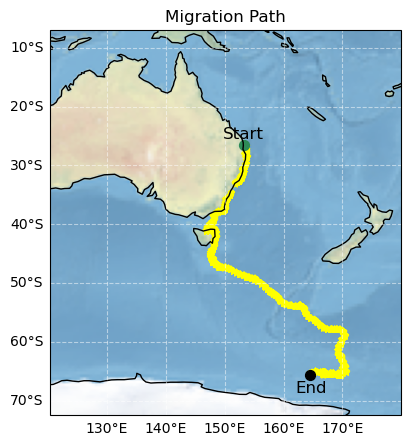

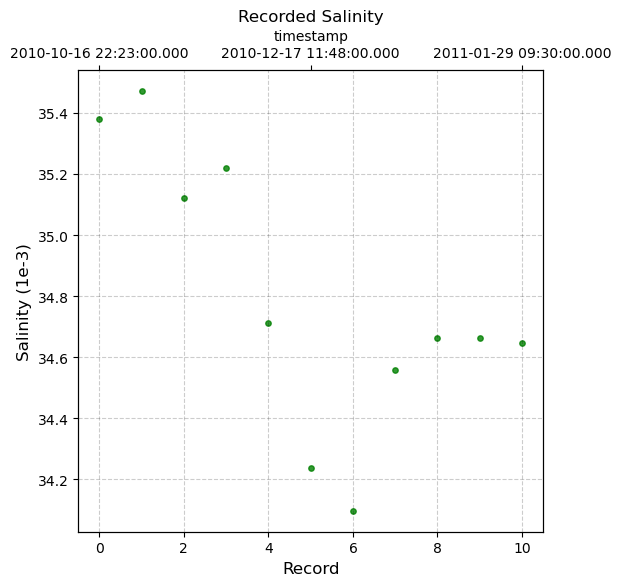

In [32]:
    #mapping code
    #Path Map
    fig1= plt.figure(figsize=(5,5))

    lon = list(df['location-long'])
    lat = list(df['location-lat'])

    map_proj = ccrs.PlateCarree()
    ax1 = plt.axes(projection = map_proj)
    ax1.coastlines()
    ax1.stock_img()
    extent = [120.4,179.9,-7,-70]
    ax1.set_extent(extent)
    ax1.set_title('Migration Path')
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')

    gl1 = ax1.gridlines(linestyle='--',color='white',alpha=0.5,draw_labels=True)
    gl1.top_labels = False
    gl1.right_labels = False
    start_point_lon = lon[0]
    start_point_lat = lat[0]
    start_label = 'Start'
    end_point_lon = lon[-1]
    end_point_lat = lat[-1]
    end_label = 'End'

    ax1.scatter(longitude1,latitude1,color='yellow',s=20,marker='*',transform=ccrs.PlateCarree())
    ax1.scatter(start_point_lon,start_point_lat,s=50,marker='o',color='#2E8B57')
    ax1.scatter(end_point_lon,end_point_lat,s=50,marker='o',color='black')
    ax1.text(start_point_lon-3.5, start_point_lat+1, start_label, fontsize=12, transform=ccrs.PlateCarree())
    ax1.text(end_point_lon-2.5, end_point_lat-3, end_label, fontsize=12, transform=ccrs.PlateCarree())

    # salinity map 
    fig2, ax2 = plt.subplots(figsize=(6,6))

    x = list(range(0,11))
    y = sal_1

    sc = plt.scatter(x,y,marker='o',s=15,color='green',alpha=0.8)
    ax2.grid(True,alpha=0.2,color='black',linestyle='--')
    ax2.set_ylabel('Salinity (1e-3)',fontsize = 'large')
    ax2.set_xlabel('Record',fontsize = 'large')
    ax2.set_title('Recorded Salinity',fontsize ='large')
    ax3 = ax2.twiny()
    time = t1

    start_point = 0
    mid_point = int(len(time)/2)
    end_point = -1

    ax3.scatter(time,y,alpha =0)
    ax3.set_xlabel('timestamp')
    ax3.set_xticks([time[start_point], time[mid_point], time[end_point]])

    #Conbine two graphs

    fig1.canvas.draw()
    fig2.canvas.draw()
    fig_combined, (new_ax1, new_ax2) = plt.subplots(1, 2, figsize=(12, 7))
    new_ax1.imshow(np.array(fig1.canvas.renderer.buffer_rgba()), aspect='auto')
    new_ax2.imshow(np.array(fig2.canvas.renderer.buffer_rgba()), aspect='auto')
    new_ax1.axis('off')
    new_ax2.axis('off')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.001)
    fig_combined.suptitle(f'No.{98129}',fontsize=20,fontweight='bold')

    plt.savefig(f'Path and salinity_{98129}.png', dpi=300)
    plt.close()